In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
# 1. Import dataset
df = pd.read_csv(r"C:\Users\Admin\OneDrive\Music\ai-ml_internship\task-3\housing.csv")

In [5]:

# 2. Data Preprocessing
df = pd.get_dummies(df, drop_first=True)

# Features and target
X = df.drop('Price', axis=1)
y = df['Price']


In [6]:
# 3. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
# 4. Model Training
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [8]:
# 5. Prediction
y_pred = lr.predict(X_test)

In [9]:
# 6. Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

MAE: 82718.44
MSE: 10591377901.57
R² Score: 0.91


In [10]:

# 7. Coefficients
coef_df = pd.DataFrame(lr.coef_, index=X.columns, columns=["Coefficient"])
print("\nModel Coefficients:\n", coef_df)


Model Coefficients:
                                                  Coefficient
Avg. Area Income                                   22.697182
Avg. Area House Age                            158035.210632
Avg. Area Number of Rooms                      111022.517127
Avg. Area Number of Bedrooms                     4821.988471
Area Population                                    14.423986
...                                                      ...
Address_Unit 9774 Box 4511\nDPO AE 44963        71540.666626
Address_Unit 9778 Box 2114\nDPO AP 59374            0.000000
Address_Unit 9785 Box 0790\nDPO AP 60371-0797  168742.813608
Address_Unit 9831 Box 7128\nDPO AA 54705            0.000000
Address_Unit 9871 Box 9037\nDPO AP 37275-9289   30477.984181

[5004 rows x 1 columns]


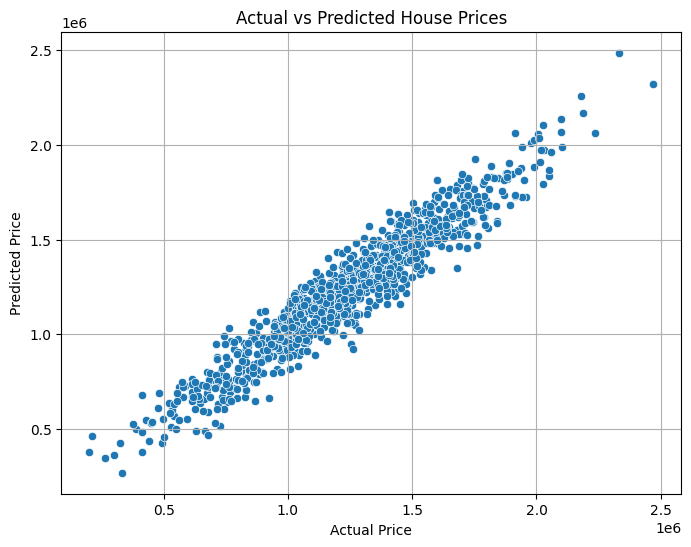

In [11]:

# 8. Plotting Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.grid(True)
plt.show()